## Understanding the data

In [1]:
from scipy.io import loadmat

mat = loadmat('data/DataSet1.mat')
data = mat['data']


In [4]:
data.size

1

In [5]:
data.shape

(1, 1)

In [6]:
# spikes
spikes = data['spikes'][0][0]   # a cell array of spike-time vectors

# number of neurons
n_neurons = int(data['nNeurons'][0][0][0][0])

# physical coordinates
x_coords = data['x'][0][0].flatten()
y_coords = data['y'][0][0].flatten()

# recording length
recording_length = data['recordinglength'][0][0][0][0]


In [8]:
spikes.size

166

In [14]:
spikes[0][0].size

19330

In [19]:
spikes[0][0][0][0:10]  # first 10 spike times of neuron 1

array([ 8230.1 , 10040.6 , 10261.95, 10383.4 , 10514.1 , 10562.4 ,
       10792.5 , 10883.9 , 10983.5 , 11084.25])

## Processing

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


In [4]:
def load_dataset(path):
    mat = sio.loadmat(path)
    data = mat['data']
    
    spikes = data['spikes'][0][0]
    n_neurons = int(data['nNeurons'][0][0][0][0])
    x = data['x'][0][0].flatten()
    y = data['y'][0][0].flatten()
    recording_length = float(data['recordinglength'][0][0][0][0])
    return spikes, n_neurons, x, y, recording_length



In [5]:
all_datasets = []

for i in range(1, 26):
    f = f"data/DataSet{i}.mat"
    spikes, n_neurons, x, y, recording_length = load_dataset(f)
    all_datasets.append({
        "spikes": spikes,
        "n": n_neurons,
        "x": x,
        "y": y,
        "T": recording_length
    })

In [22]:
all_datasets[24]["spikes"][0][0]

array([[2.67015000e+03, 2.70450000e+03, 2.76020000e+03, ...,
        3.55798165e+06, 3.58317160e+06, 3.59249280e+06]])

## Rate Coding

Rate coding assumes that neurons encode information in their firing rate — the number of spikes per unit time.
For each neuron, the firing rate is computed by counting spikes within a time window.
When we take the mean across neurons, we get the population firing rate (of all neurons in a dataset)


In [ ]:
def compute_firing_rates(neurons, T_ms):
    rates = []
    T_sec = T_ms / 1000  #to sec
    
    for sp in neurons:
        spike_times = sp[0][0]  
        rates.append(len(spike_times) / T_sec)
        
    return np.array(rates)


In [15]:
for i, x in enumerate(all_datasets):
    x['firing_rates'] = compute_firing_rates(x['spikes'], x['T'])
    print(f"Mean firing rate for all neurons for dataset {i}:", np.mean(x['firing_rates']))

Mean firing rate for all neurons for dataset 0: 1.5696419009370814
Mean firing rate for all neurons for dataset 1: 1.0954389265111613
Mean firing rate for all neurons for dataset 2: 5.119132996632997
Mean firing rate for all neurons for dataset 3: 1.8052097505668931
Mean firing rate for all neurons for dataset 4: 0.766607629427793
Mean firing rate for all neurons for dataset 5: 1.5805477855477856
Mean firing rate for all neurons for dataset 6: 0.8966715116279069
Mean firing rate for all neurons for dataset 7: 2.363280977312391
Mean firing rate for all neurons for dataset 8: 1.2606481481481482
Mean firing rate for all neurons for dataset 9: 1.1081748188405798
Mean firing rate for all neurons for dataset 10: 3.2881527206218566
Mean firing rate for all neurons for dataset 11: 2.8038407193320487
Mean firing rate for all neurons for dataset 12: 1.9541039661708952
Mean firing rate for all neurons for dataset 13: 4.17702576754386
Mean firing rate for all neurons for dataset 14: 4.477429881337

## Plots

In [16]:
ds = all_datasets[0]   # dataset 1
spikes = ds["spikes"]
rates = ds["firing_rates"]
x = ds["x"]
y = ds["y"]
T = ds["T"]


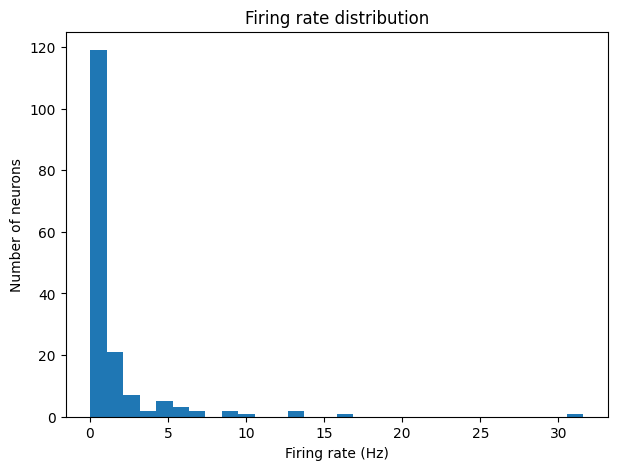

In [17]:
plt.figure(figsize=(7,5))
plt.hist(rates, bins=30)
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Number of neurons")
plt.title("Firing rate distribution")
plt.show()


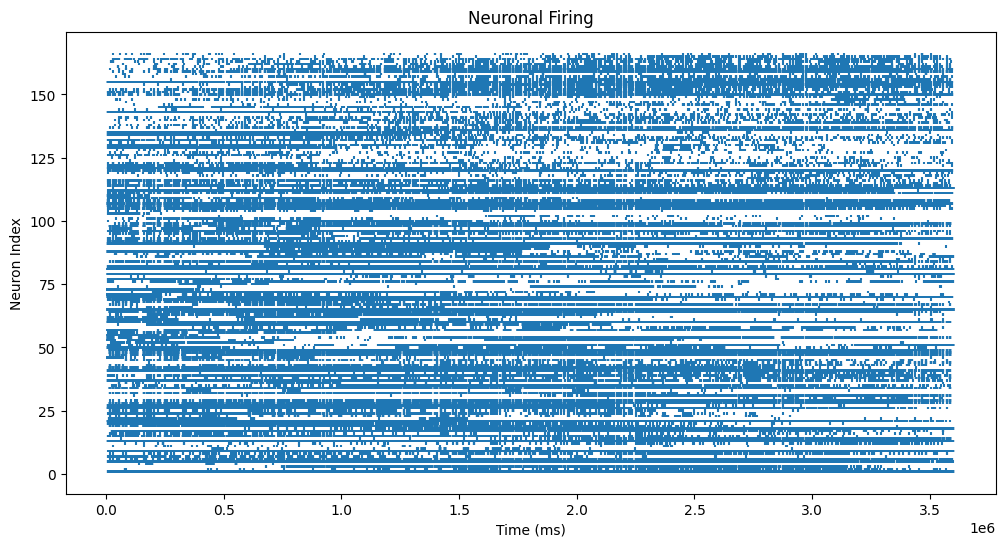

In [18]:
def plot_raster(spikes):
    plt.figure(figsize=(12,6))
    for neuron_idx, sp in enumerate(spikes):
        spike_times = sp[0]
        plt.vlines(spike_times, neuron_idx + 0.5, neuron_idx + 1.5)
    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron Index")
    plt.title("Neuronal Firing")
    plt.show()

plot_raster(spikes)
